In [109]:
%matplotlib inline 
import matplotlib.pyplot as plt


In [110]:
import pandas as pd
import numpy as np

In [272]:
from collections import defaultdict
dfs = defaultdict(defaultdict)
from itertools import product

#average each run with same parameters
df_big = pd.DataFrame(columns=["iterations","fitness","time","fevals","algorithm","hp","run","problem"])

#for problem in ["KNAPSACK","FOURPEAKS","CONTPEAKS","TSP"]:
for problem in ["CONTPEAKS","KNAPSACK"]:

    for run in range(1,6):
        
        #for ga
        for pop,mate,mutate in product([200],[100,60,20],[100,60,20]):
            ga = pd.read_csv("{}/{}_GA{}_{}_{}_{}_LOG.txt".format(problem,problem,pop,mate,mutate,run)) 
            ga["algorithm"] = "GA"
            ga["hp"] = "pop_{}_mate_{}_mutate_{}".format(pop,mate,mutate)
            ga["run"] = run
            ga["problem"] = problem
            df_big = df_big.append(ga)
        
        
        #for rhc
        rhc = pd.read_csv("{}/{}_RHC_{}_LOG.txt".format(problem,problem,run))
        rhc["algorithm"] = "RHC"
        rhc["hp"] = "None"#.format(pop,mate,mutate)
        rhc["run"] = run
        rhc["problem"] = problem
        df_big = df_big.append(rhc)
        
        
        
        #for SA
        
        for CE in [0.15, 0.35, 0.55, 0.75, 0.95]:
            sa = pd.read_csv("{}/{}_SA{}_{}_LOG.txt".format(problem,problem,CE,run))
            sa["algorithm"] = "SA"
            sa["hp"] = "temp_{}".format(CE)
            sa["run"] = run
            sa["problem"] = problem
            df_big = df_big.append(sa)
            
            
            
        #for MIMIC
        for samples, keep, m in product([200], [100], [0.1, 0.3, 0.5, 0.7, 0.9]):
            mimic = pd.read_csv("{}/{}_MIMIC{}_{}_{}_{}_LOG.txt".format(problem,problem,samples,keep,m,run))
            mimic["algorithm"] = "MIMIC"
            mimic["hp"]= "samples_{}_keep_{}_m_{}".format(samples,keep,m)
            mimic["run"] = run
            mimic["problem"] = problem
            df_big = df_big.append(mimic)
        
        
for problem in ["TSP","FLIPFLOP"]:
    for run in range(1,6):
        
        #for ga
        for pop,mate,mutate in product([100],[50,30,10],[50,30,10]):
            ga = pd.read_csv("{}/{}_GA{}_{}_{}_{}_LOG.txt".format(problem,problem,pop,mate,mutate,run)) 
            ga["algorithm"] = "GA"
            ga["hp"] = "pop_{}_mate_{}_mutate_{}".format(pop,mate,mutate)
            ga["run"] = run
            ga["problem"] = problem
            df_big = df_big.append(ga)
        
        
        #for rhc
        rhc = pd.read_csv("{}/{}_RHC_{}_LOG.txt".format(problem,problem,run))
        rhc["algorithm"] = "RHC"
        rhc["hp"] = "None"#.format(pop,mate,mutate)
        rhc["run"] = run
        rhc["problem"] = problem
        df_big = df_big.append(rhc)
        
        
        
        #for SA
        
        for CE in [0.15, 0.35, 0.55, 0.75, 0.95]:
            sa = pd.read_csv("{}/{}_SA{}_{}_LOG.txt".format(problem,problem,CE,run))
            sa["algorithm"] = "SA"
            sa["hp"] = "temp_{}".format(CE)
            sa["run"] = run
            sa["problem"] = problem
            df_big = df_big.append(sa)
            
            
            
        #for MIMIC
        for samples, keep, m in product([100], [50], [0.1, 0.3, 0.5, 0.7, 0.9]):
            mimic = pd.read_csv("{}/{}_MIMIC{}_{}_{}_{}_LOG.txt".format(problem,problem,samples,keep,m,run))
            mimic["algorithm"] = "MIMIC"
            mimic["hp"]= "samples_{}_keep_{}_m_{}".format(samples,keep,m)
            mimic["run"] = run
            mimic["problem"] = problem
            df_big = df_big.append(mimic)
        
        
        

In [291]:
maxes=df_big.groupby(["problem","algorithm","hp","iterations"]).mean()
maxes.head()

fitness      time
problem   algorithm hp                          iterations                   
CONTPEAKS GA        pop_200_mate_100_mutate_100 0              20.4  0.006082
                                                10             22.0  0.010836
                                                20             23.0  0.014891
                                                30             23.8  0.018883
                                                40             25.0  0.022753

In [296]:
maxed=maxes.groupby(by=["problem","algorithm","hp","iterations"])['fitness'].mean()
best_hp = maxed.reset_index().groupby(["problem","algorithm"]).max()

In [309]:
df_big[["algorithm","hp","problem"]].drop_duplicates()

algorithm                           hp    problem
0         GA  pop_200_mate_100_mutate_100  CONTPEAKS
0         GA   pop_200_mate_100_mutate_60  CONTPEAKS
0         GA   pop_200_mate_100_mutate_20  CONTPEAKS
0         GA   pop_200_mate_60_mutate_100  CONTPEAKS
0         GA    pop_200_mate_60_mutate_60  CONTPEAKS
0         GA    pop_200_mate_60_mutate_20  CONTPEAKS
0         GA   pop_200_mate_20_mutate_100  CONTPEAKS
0         GA    pop_200_mate_20_mutate_60  CONTPEAKS
0         GA    pop_200_mate_20_mutate_20  CONTPEAKS
0        RHC                         None  CONTPEAKS
0         SA                    temp_0.15  CONTPEAKS
0         SA                    temp_0.35  CONTPEAKS
0         SA                    temp_0.55  CONTPEAKS
0         SA                    temp_0.75  CONTPEAKS
0         SA                    temp_0.95  CONTPEAKS
0      MIMIC   samples_200_keep_100_m_0.1  CONTPEAKS
0      MIMIC   samples_200_keep_100_m_0.3  CONTPEAKS
0      MIMIC   samples_200_keep_100_m_0.5  CONTPEAKS
0      MIMIC   samples_200_keep_100_m_0.7  CONTPEAKS
0      MIMIC   samples_200_keep_100_m_0.9  CONTPEAKS
0         GA  pop_200_mate_100_mutate_100   KNAPSACK
0         GA   pop_200_mate_100_mutate_60   KNAPSACK
0         GA   pop_200_mate_100_mutate_20   KNAPSACK
0         GA   pop_200_mate_60_mutate_100   KNAPSACK
0         GA    pop_200_mate_60_mutate_60   KNAPSACK
0         GA    pop_200_mate_60_mutate_20   KNAPSACK
0         GA   pop_200_mate_20_mutate_100   KNAPSACK
0         GA    pop_200_mate_20_mutate_60   KNAPSACK
0         GA    pop_200_mate_20_mutate_20   KNAPSACK
0        RHC                         None   KNAPSACK
..       ...                          ...        ...
0         SA                    temp_0.15        TSP
0         SA                    temp_0.35        TSP
0         SA                    temp_0.55        TSP
0         SA                    temp_0.75        TSP
0         SA                    temp_0.95        TSP
0      MIMIC    samples_100_keep_50_m_0.1        TSP
0      MIMIC    samples_100_keep_50_m_0.3        TSP
0      MIMIC    samples_100_keep_50_m_0.5        TSP
0      MIMIC    samples_100_keep_50_m_0.7        TSP
0      MIMIC    samples_100_keep_50_m_0.9        TSP
0         GA    pop_100_mate_50_mutate_50   FLIPFLOP
0         GA    pop_100_mate_50_mutate_30   FLIPFLOP
0         GA    pop_100_mate_50_mutate_10   FLIPFLOP
0         GA    pop_100_mate_30_mutate_50   FLIPFLOP
0         GA    pop_100_mate_30_mutate_30   FLIPFLOP
0         GA    pop_100_mate_30_mutate_10   FLIPFLOP
0         GA    pop_100_mate_10_mutate_50   FLIPFLOP
0         GA    pop_100_mate_10_mutate_30   FLIPFLOP
0         GA    pop_100_mate_10_mutate_10   FLIPFLOP
0        RHC                         None   FLIPFLOP
0         SA                    temp_0.15   FLIPFLOP
0         SA                    temp_0.35   FLIPFLOP
0         SA                    temp_0.55   FLIPFLOP
0         SA                    temp_0.75   FLIPFLOP
0         SA                    temp_0.95   FLIPFLOP
0      MIMIC    samples_100_keep_50_m_0.1   FLIPFLOP
0      MIMIC    samples_100_keep_50_m_0.3   FLIPFLOP
0      MIMIC    samples_100_keep_50_m_0.5   FLIPFLOP
0      MIMIC    samples_100_keep_50_m_0.7   FLIPFLOP
0      MIMIC    samples_100_keep_50_m_0.9   FLIPFLOP

[80 rows x 3 columns]

In [276]:
hp = maxed.reset_index().groupby(["problem","algorithm"]).max()
hp

hp       fitness
problem   algorithm                                          
CONTPEAKS GA          pop_200_mate_60_mutate_60     96.993613
          MIMIC      samples_200_keep_100_m_0.9     94.968463
          RHC                              None     32.156886
          SA                          temp_0.95     37.781238
FLIPFLOP  GA          pop_100_mate_50_mutate_50    145.436545
          MIMIC       samples_100_keep_50_m_0.9    170.096346
          RHC                              None    157.873754
          SA                          temp_0.95    164.166113
KNAPSACK  GA          pop_200_mate_60_mutate_60  14589.310122
          MIMIC      samples_200_keep_100_m_0.9  18002.477001
          RHC                              None  15819.730687
          SA                          temp_0.95  15871.499959
TSP       GA          pop_100_mate_50_mutate_50      0.157940
          MIMIC       samples_100_keep_50_m_0.9      0.089085
          RHC                              None      0.098444
          SA                          temp_0.95      0.107903

In [275]:
list(best_hp["hp"].value_counts().index)

['temp_0.95',
 'None',
 'pop_200_mate_60_mutate_60',
 'samples_100_keep_50_m_0.9',
 'pop_100_mate_50_mutate_50',
 'samples_200_keep_100_m_0.9']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


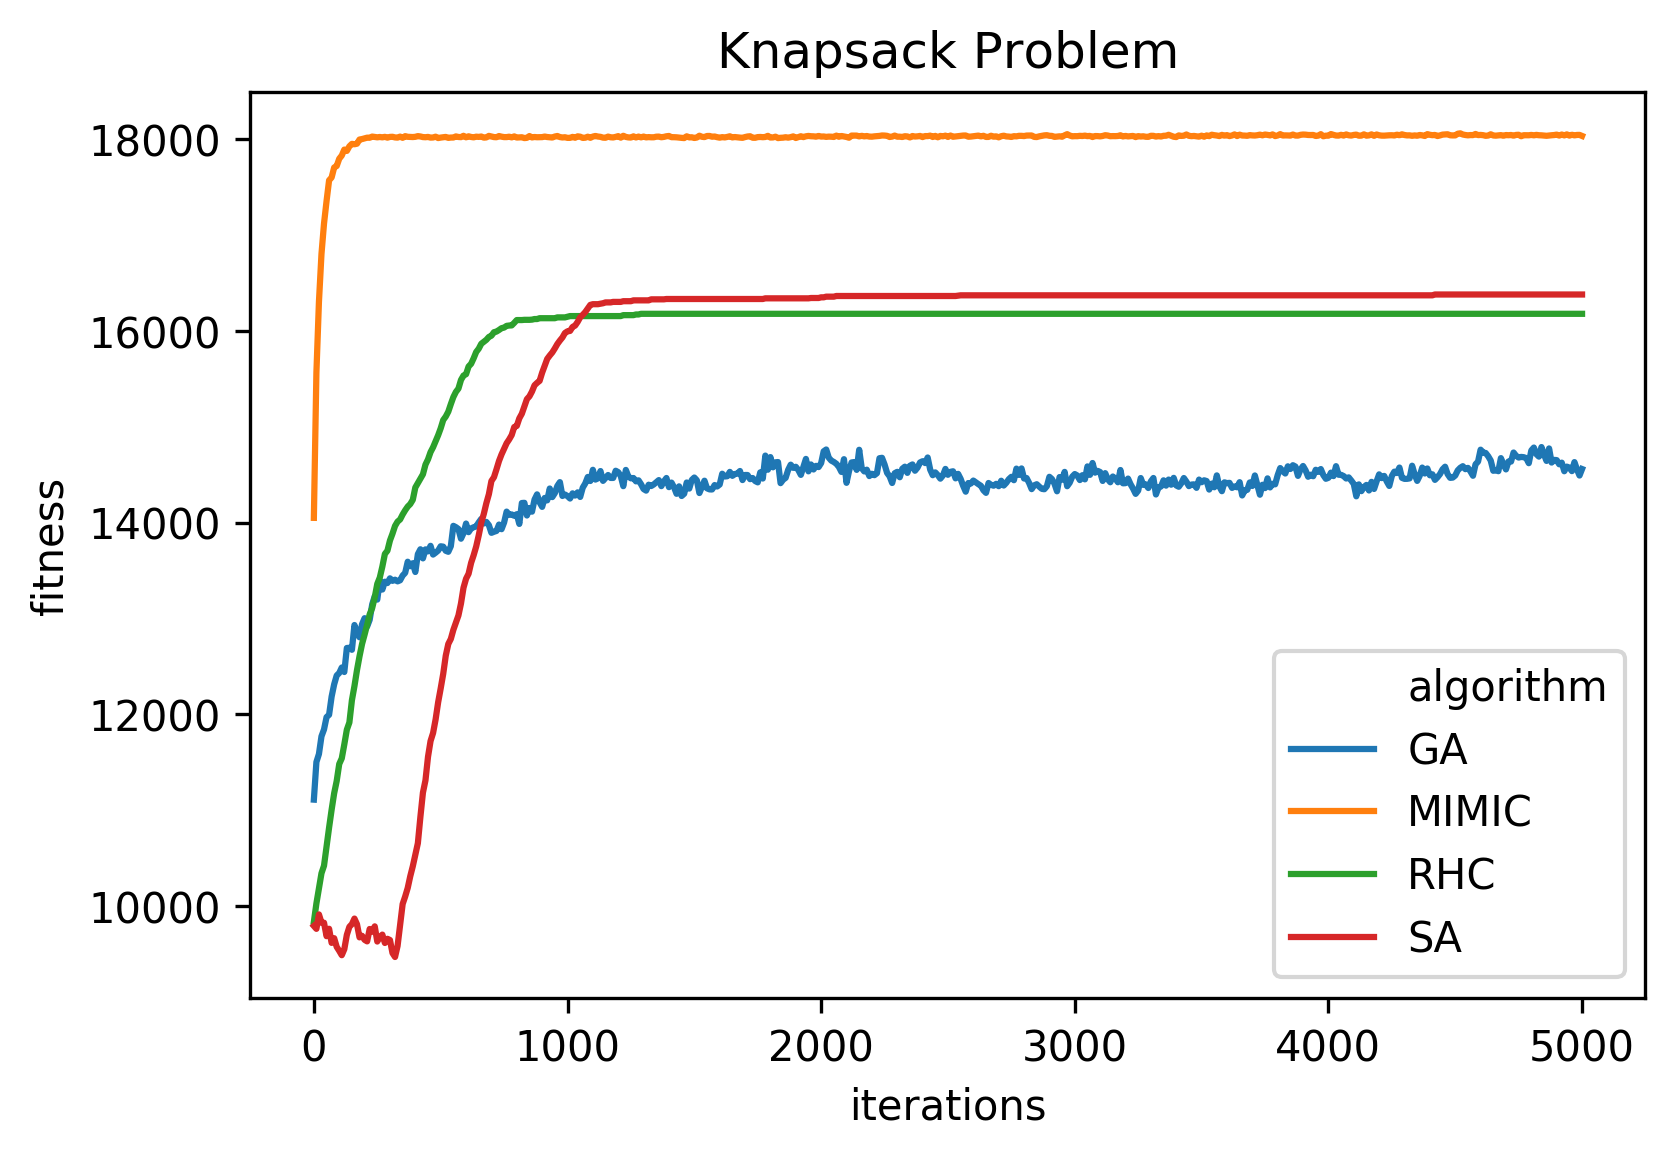

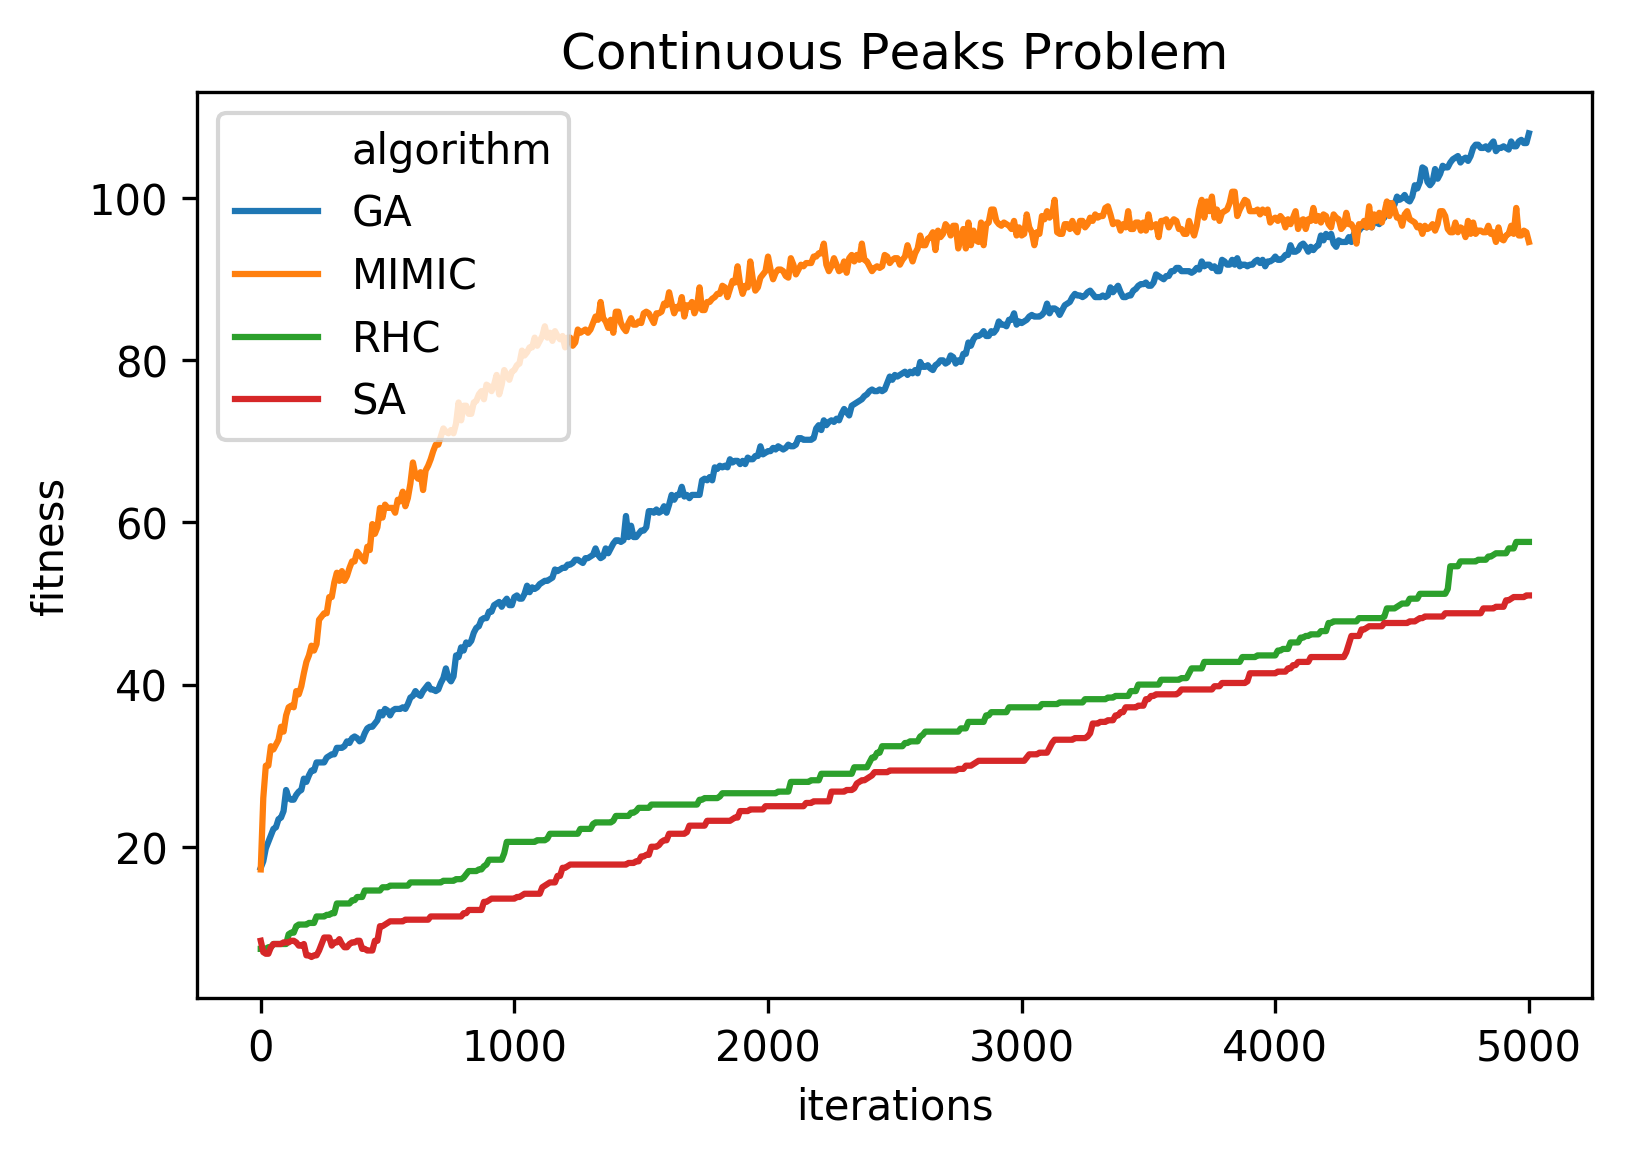

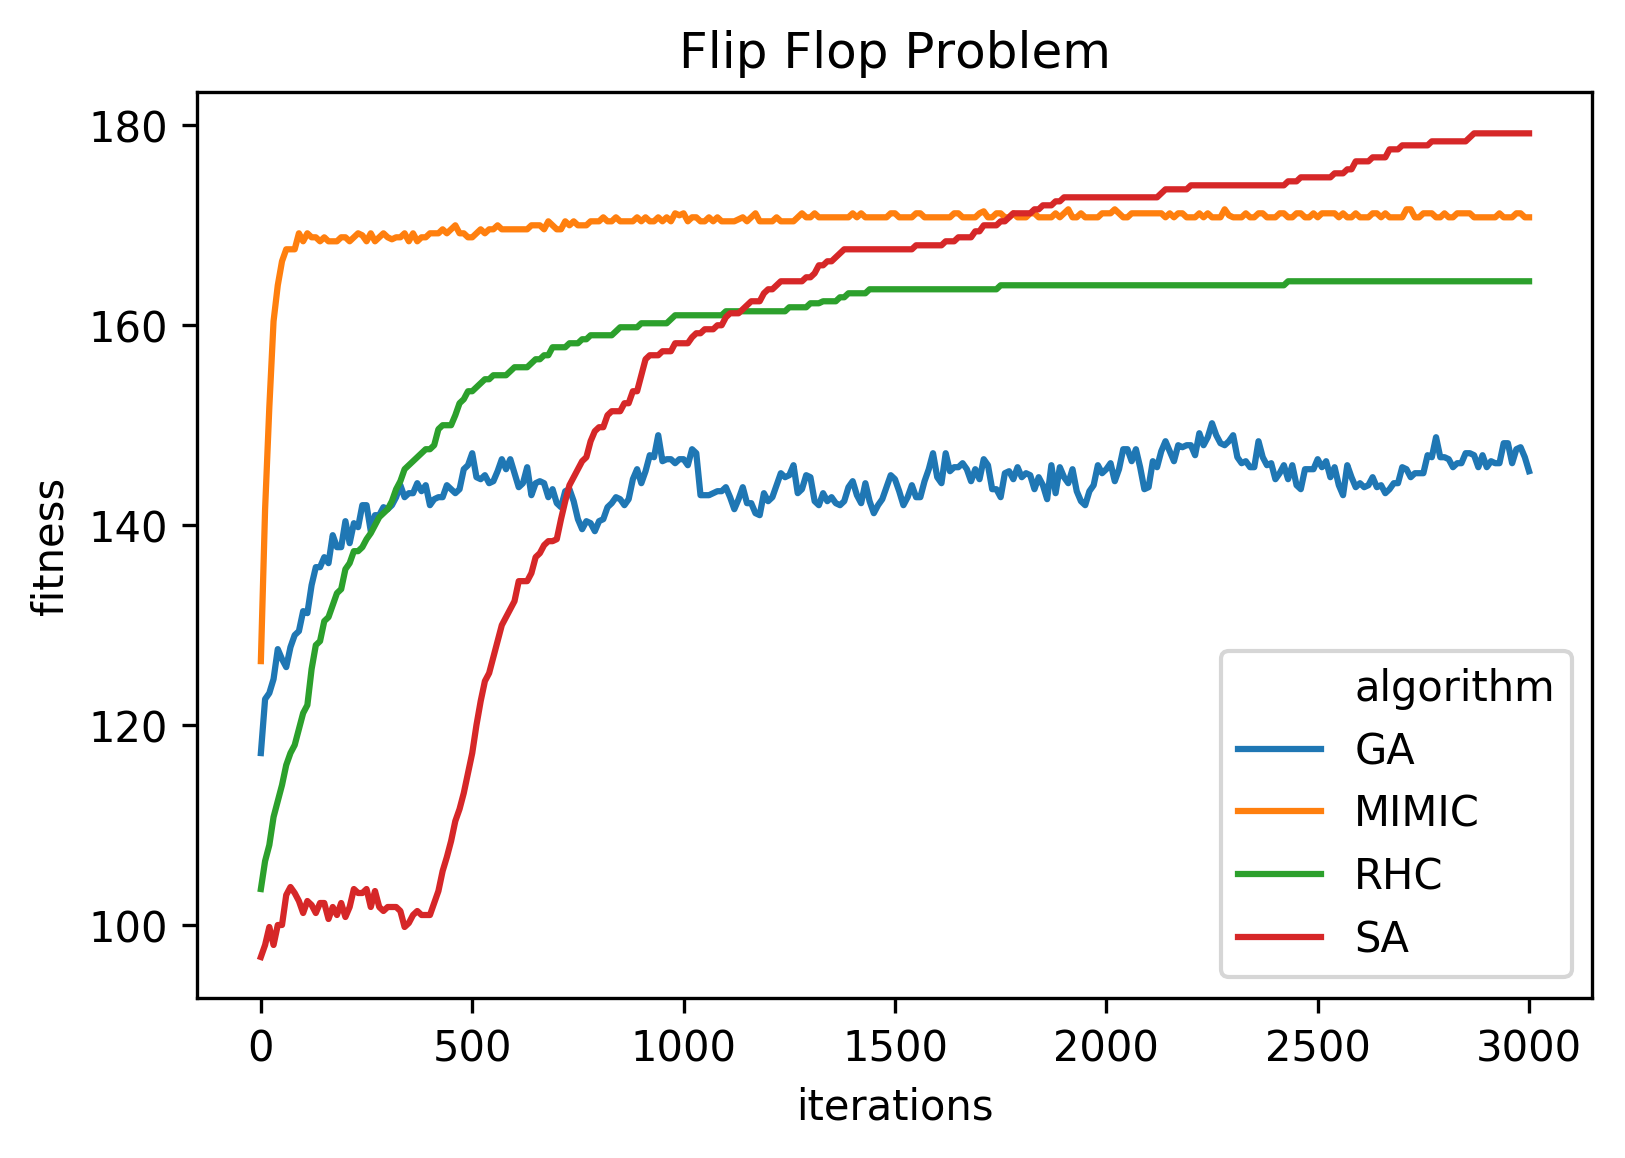

In [337]:
df_clean = df_big[df_big["hp"].isin(set(list(best_hp["hp"].value_counts().index)))]
df_clean['fevals'] = pd.to_numeric(df_clean['fevals'])
df_clean=df_clean.groupby(["problem","algorithm","iterations"])[['fitness','fevals','time']].agg({'fitness':'mean','fevals':'mean','time':'mean'}).reset_index()
import matplotlib as mpl
mpl.rc("savefig", dpi=300)
mpl.rcParams['figure.dpi']= 300

import seaborn as sns
df_knapsack = df_clean[df_clean["problem"] == "KNAPSACK"]
df_fourpeaks=df_clean[df_clean["problem"] == "FOURPEAKS"]
df_tsp= df_clean[df_clean["problem"] == "TSP"]
df_contpeaks= df_clean[df_clean["problem"] == "CONTPEAKS"]
df_nq= df_clean[df_clean["problem"] == "NQUEENS"]
df_ff = df_clean[df_clean["problem"] == "FLIPFLOP"]
df_GA = df_clean[df_clean["algorithm"] == "GA"]
df_SA=df_clean[df_clean["algorithm"] == "SA"]
df_RHC= df_clean[df_clean["algorithm"] == "RHC"]
df_MIMIC= df_clean[df_clean["algorithm"] == "MIMIC"]
#df_nq= df_clean[df_clean["problem"] == "NQUEENS"]
#df_ff = df_clean[df_clean["problem"] == "FLIPFLOP"]




df_knapsack.head()

#df_sa
#df_rhc

#fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
#axes =[ax1,ax2,ax3]

names = ["Knapsack Problem","Continuous Peaks Problem","Flip Flop Problem"]
for idx,df_p in enumerate([df_knapsack,df_contpeaks,df_ff]):
    sns.lineplot(df_p['iterations'],df_p['fitness'],hue=df_p["algorithm"],ci=None)
    plt.title(names[idx])
    plt.savefig(names[idx]+"_IterFit")
    plt.show()
    


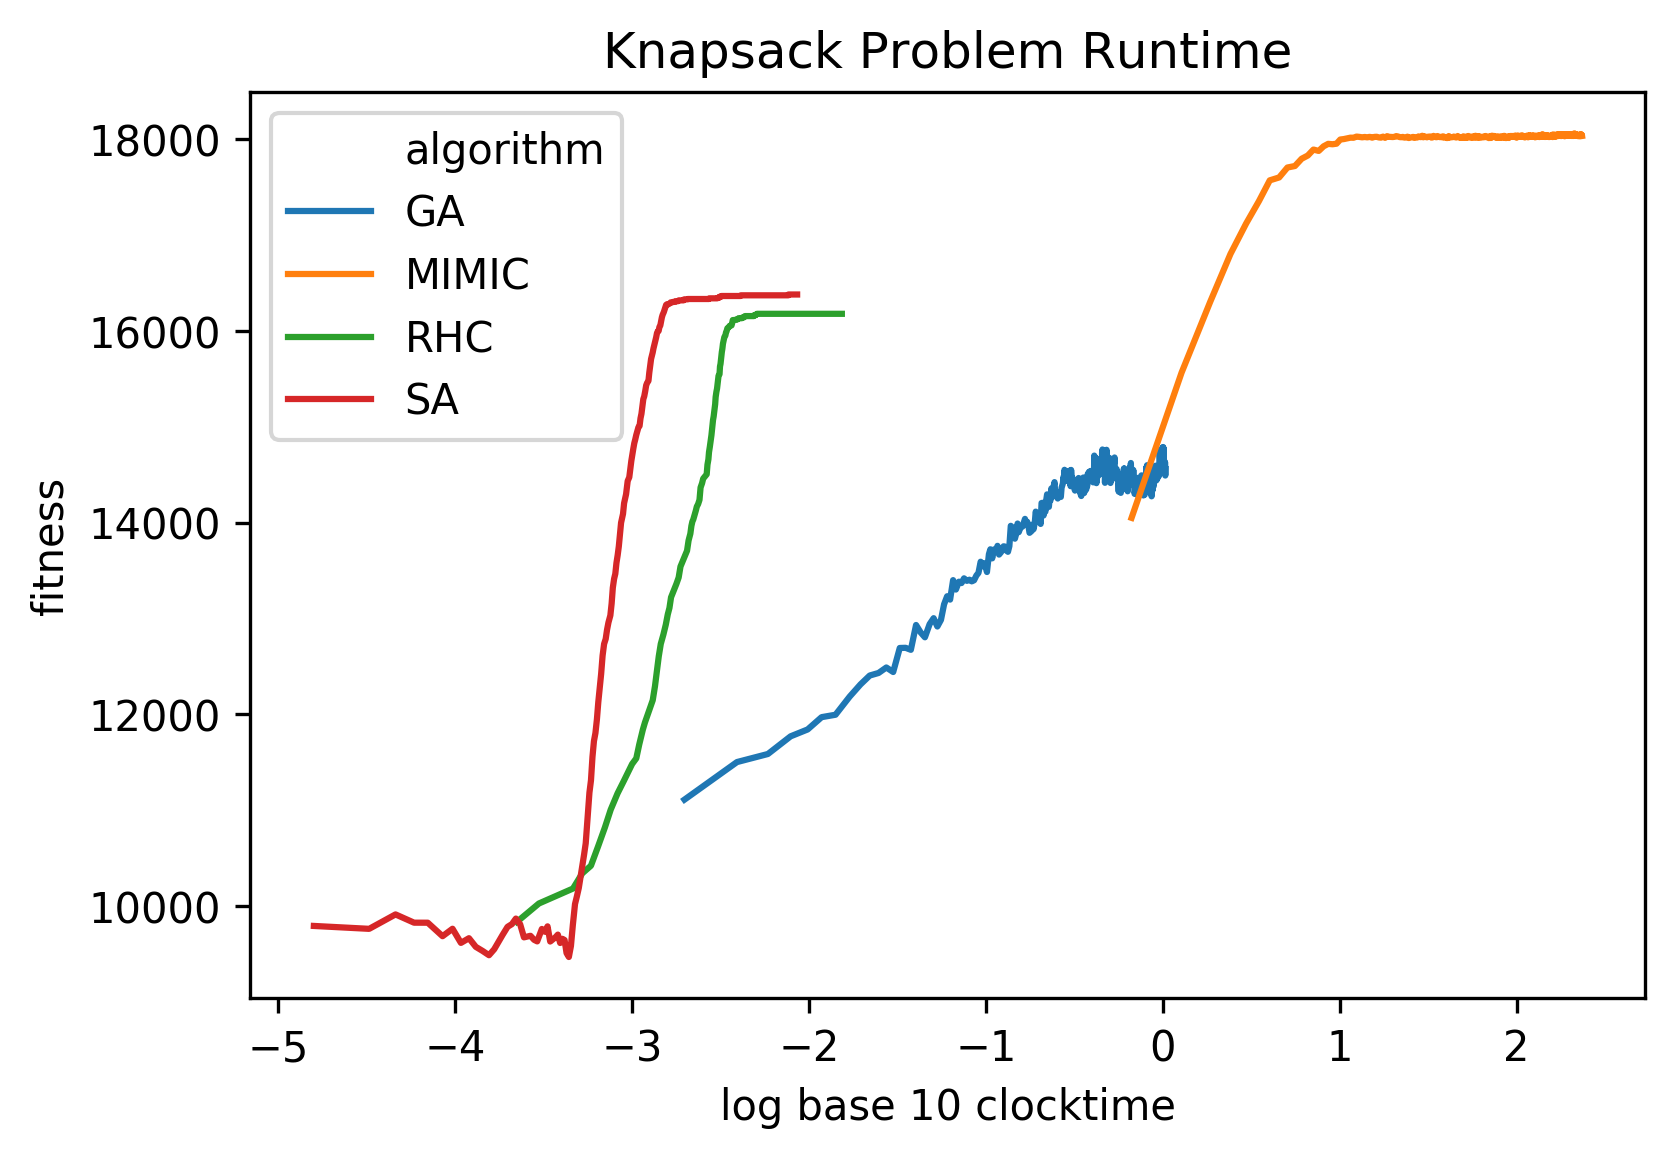

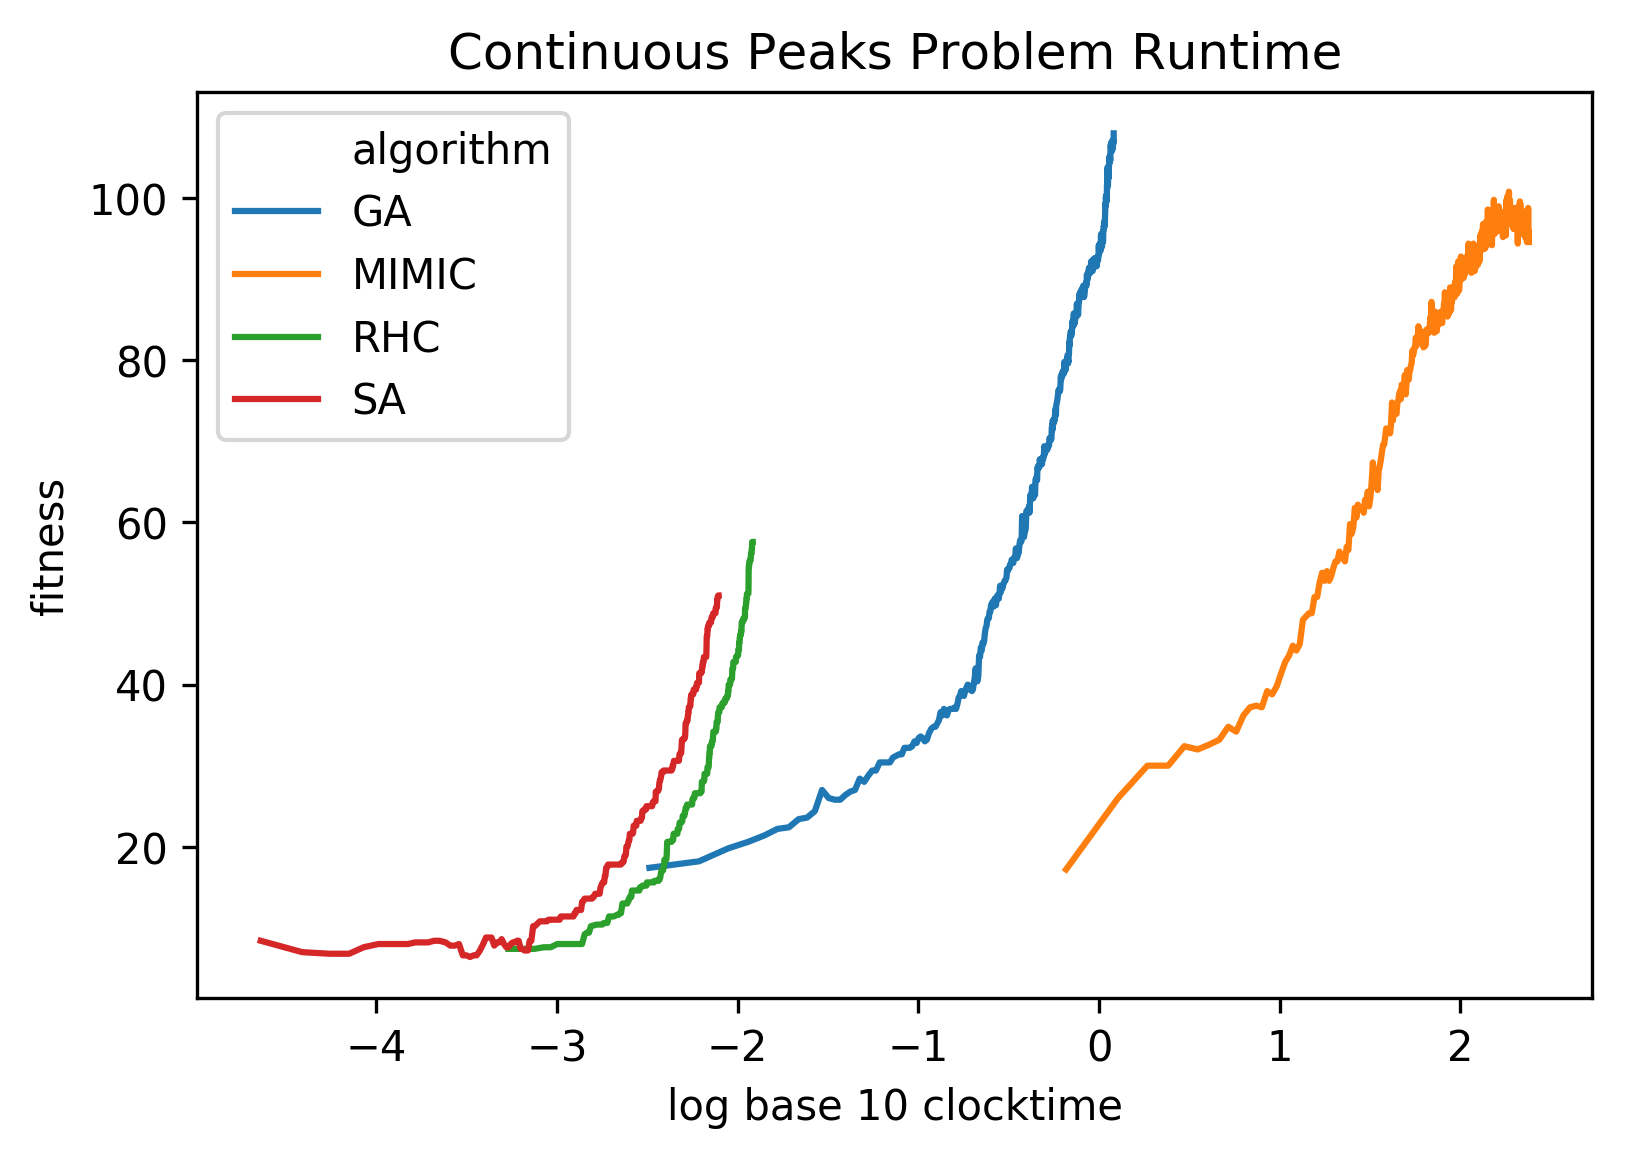

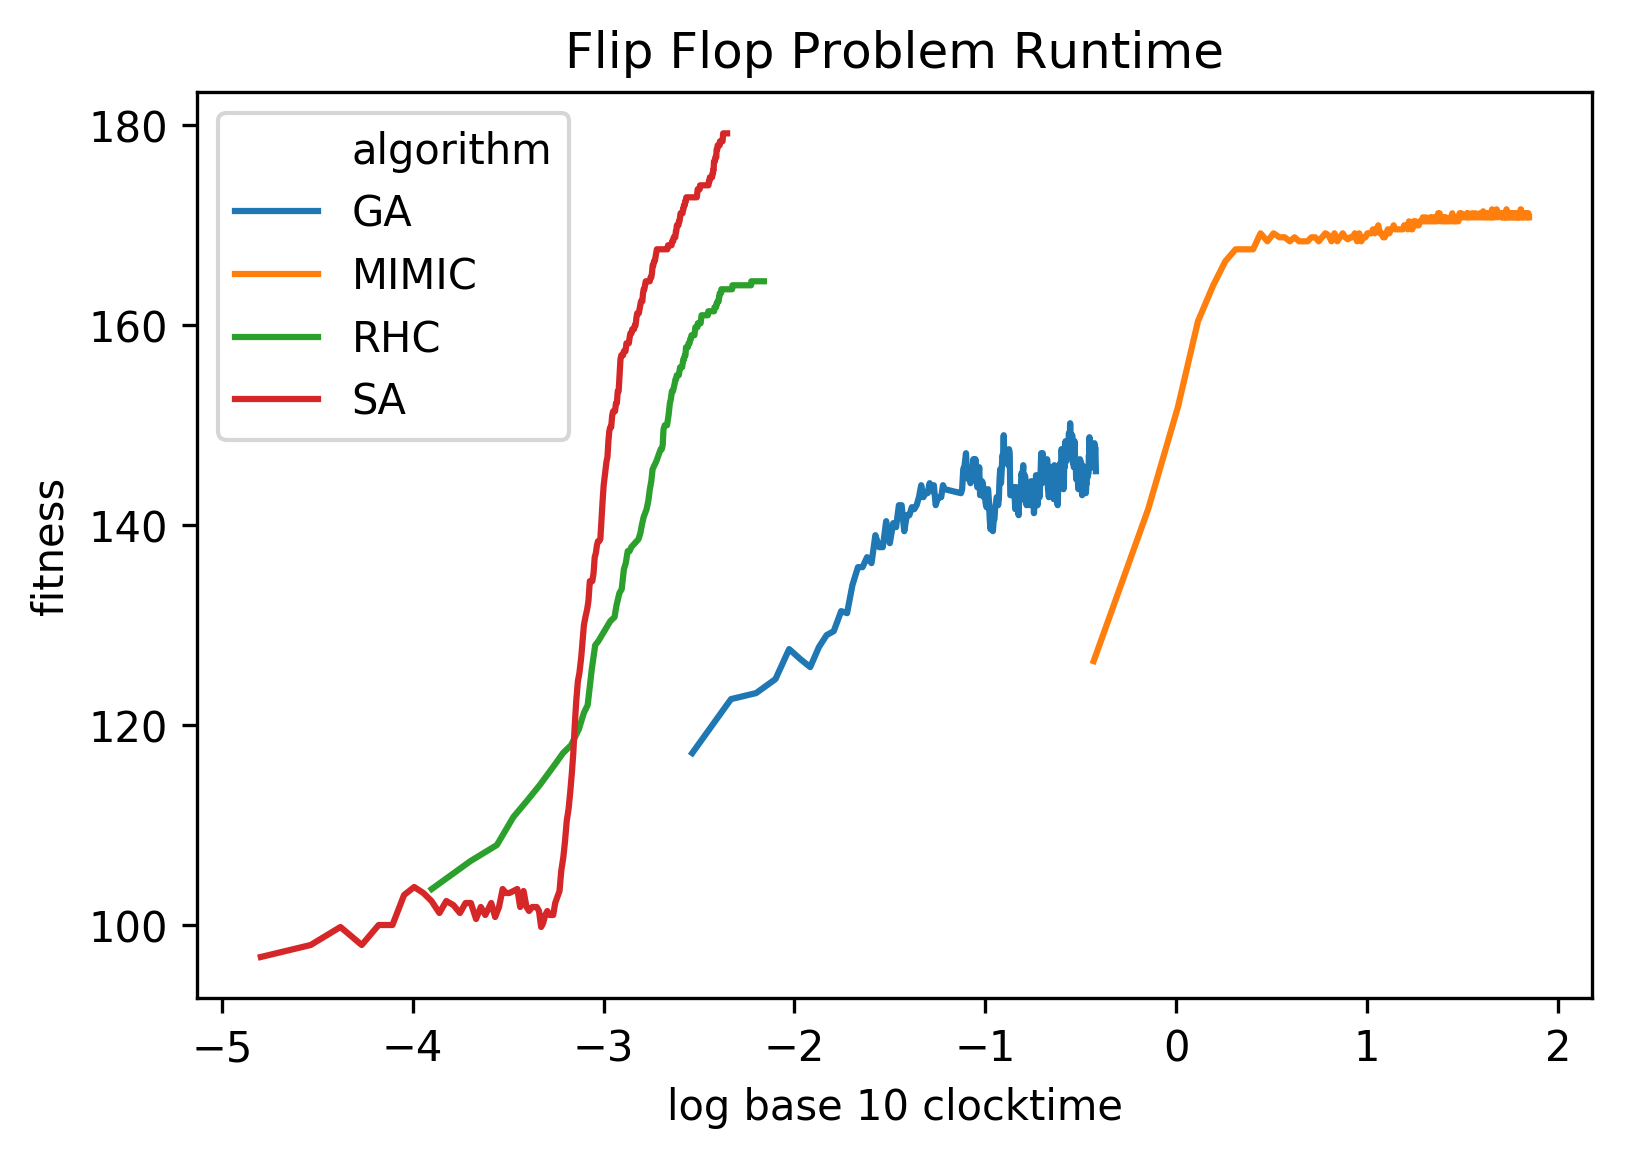

In [353]:
names = ["Knapsack Problem Runtime","Continuous Peaks Problem Runtime","Flip Flop Problem Runtime"]
for idx,df_p in enumerate([df_knapsack,df_contpeaks,df_ff]):
    ax=sns.lineplot(np.log10(df_p['time']),(df_p['fitness']),hue=df_p["algorithm"],ci=None)
    #plt.xlim(0, 2)
    plt.title(names[idx])
    ax.set_xlabel("log base 10 clocktime")
    plt.savefig(names[idx]+"_TimeFit.png")
    plt.show()

In [178]:
df_knapsack

problem algorithm  iterations  fevals      time       fitness
4004  KNAPSACK        GA           0     798  0.001002  10848.612214
4005  KNAPSACK        GA          10    1492  0.002118  11092.883219
4006  KNAPSACK        GA          20    2185  0.003337  11532.558243
4007  KNAPSACK        GA          30    2875  0.004315  11655.199945
4008  KNAPSACK        GA          40    3586  0.005248  11631.718628
4009  KNAPSACK        GA          50    4282  0.006207  11673.101527
4010  KNAPSACK        GA          60    4973  0.007140  11698.574824
4011  KNAPSACK        GA          70    5668  0.008080  11927.989126
4012  KNAPSACK        GA          80    6370  0.009007  11950.743438
4013  KNAPSACK        GA          90    7066  0.009966  11962.292368
4014  KNAPSACK        GA         100    7763  0.010897  12128.712507
4015  KNAPSACK        GA         110    8456  0.011810  12169.187621
4016  KNAPSACK        GA         120    9157  0.012731  12259.570872
4017  KNAPSACK        GA         130    9844  0.013935  12149.309691
4018  KNAPSACK        GA         140   10543  0.014872  12183.506216
4019  KNAPSACK        GA         150   11227  0.015812  12147.401650
4020  KNAPSACK        GA         160   11917  0.016724  11942.908729
4021  KNAPSACK        GA         170   12615  0.017673  11939.220262
4022  KNAPSACK        GA         180   13309  0.018991  12058.290664
4023  KNAPSACK        GA         190   13999  0.020101  12026.700676
4024  KNAPSACK        GA         200   14696  0.021257  12205.013169
4025  KNAPSACK        GA         210   15398  0.022370  12158.179252
4026  KNAPSACK        GA         220   16101  0.023563  12073.681069
4027  KNAPSACK        GA         230   16792  0.024763  12004.026970
4028  KNAPSACK        GA         240   17500  0.026189  12071.793698
4029  KNAPSACK        GA         250   18193  0.027547  12214.736756
4030  KNAPSACK        GA         260   18897  0.028680  12361.268451
4031  KNAPSACK        GA         270   19589  0.029782  12446.016883
4032  KNAPSACK        GA         280   20268  0.030902  12522.141906
4033  KNAPSACK        GA         290   20966  0.032010  12304.818273
...        ...       ...         ...     ...       ...           ...
5978  KNAPSACK        SA        4710    4721  0.006615  15801.902320
5979  KNAPSACK        SA        4720    4731  0.006630  15801.902320
5980  KNAPSACK        SA        4730    4741  0.006646  15801.902320
5981  KNAPSACK        SA        4740    4751  0.006661  15801.902320
5982  KNAPSACK        SA        4750    4761  0.006676  15801.902320
5983  KNAPSACK        SA        4760    4771  0.006692  15801.902320
5984  KNAPSACK        SA        4770    4781  0.006707  15801.902320
5985  KNAPSACK        SA        4780    4791  0.006729  15801.902320
5986  KNAPSACK        SA        4790    4801  0.006743  15801.902320
5987  KNAPSACK        SA        4800    4811  0.006758  15801.902320
5988  KNAPSACK        SA        4810    4821  0.006772  15801.902320
5989  KNAPSACK        SA        4820    4831  0.006786  15801.902320
5990  KNAPSACK        SA        4830    4841  0.006802  15801.902320
5991  KNAPSACK        SA        4840    4851  0.006815  15801.902320
5992  KNAPSACK        SA        4850    4861  0.006829  15801.902320
5993  KNAPSACK        SA        4860    4871  0.006842  15801.902320
5994  KNAPSACK        SA        4870    4881  0.006859  15801.902320
5995  KNAPSACK        SA        4880    4891  0.006872  15801.902320
5996  KNAPSACK        SA        4890    4901  0.006885  15801.902320
5997  KNAPSACK        SA        4900    4911  0.006899  15801.902320
5998  KNAPSACK        SA        4910    4921  0.006913  15801.902320
5999  KNAPSACK        SA        4920    4931  0.006926  15801.902320
6000  KNAPSACK        SA        4930    4941  0.006940  15801.902320
6001  KNAPSACK        SA        4940    4951  0.006955  15801.902320
6002  KNAPSACK        SA        4950    4961  0.006972  15801.902320
6003  KNAPSACK        SA        4960    4971  0.006987  15801.902320
6004 

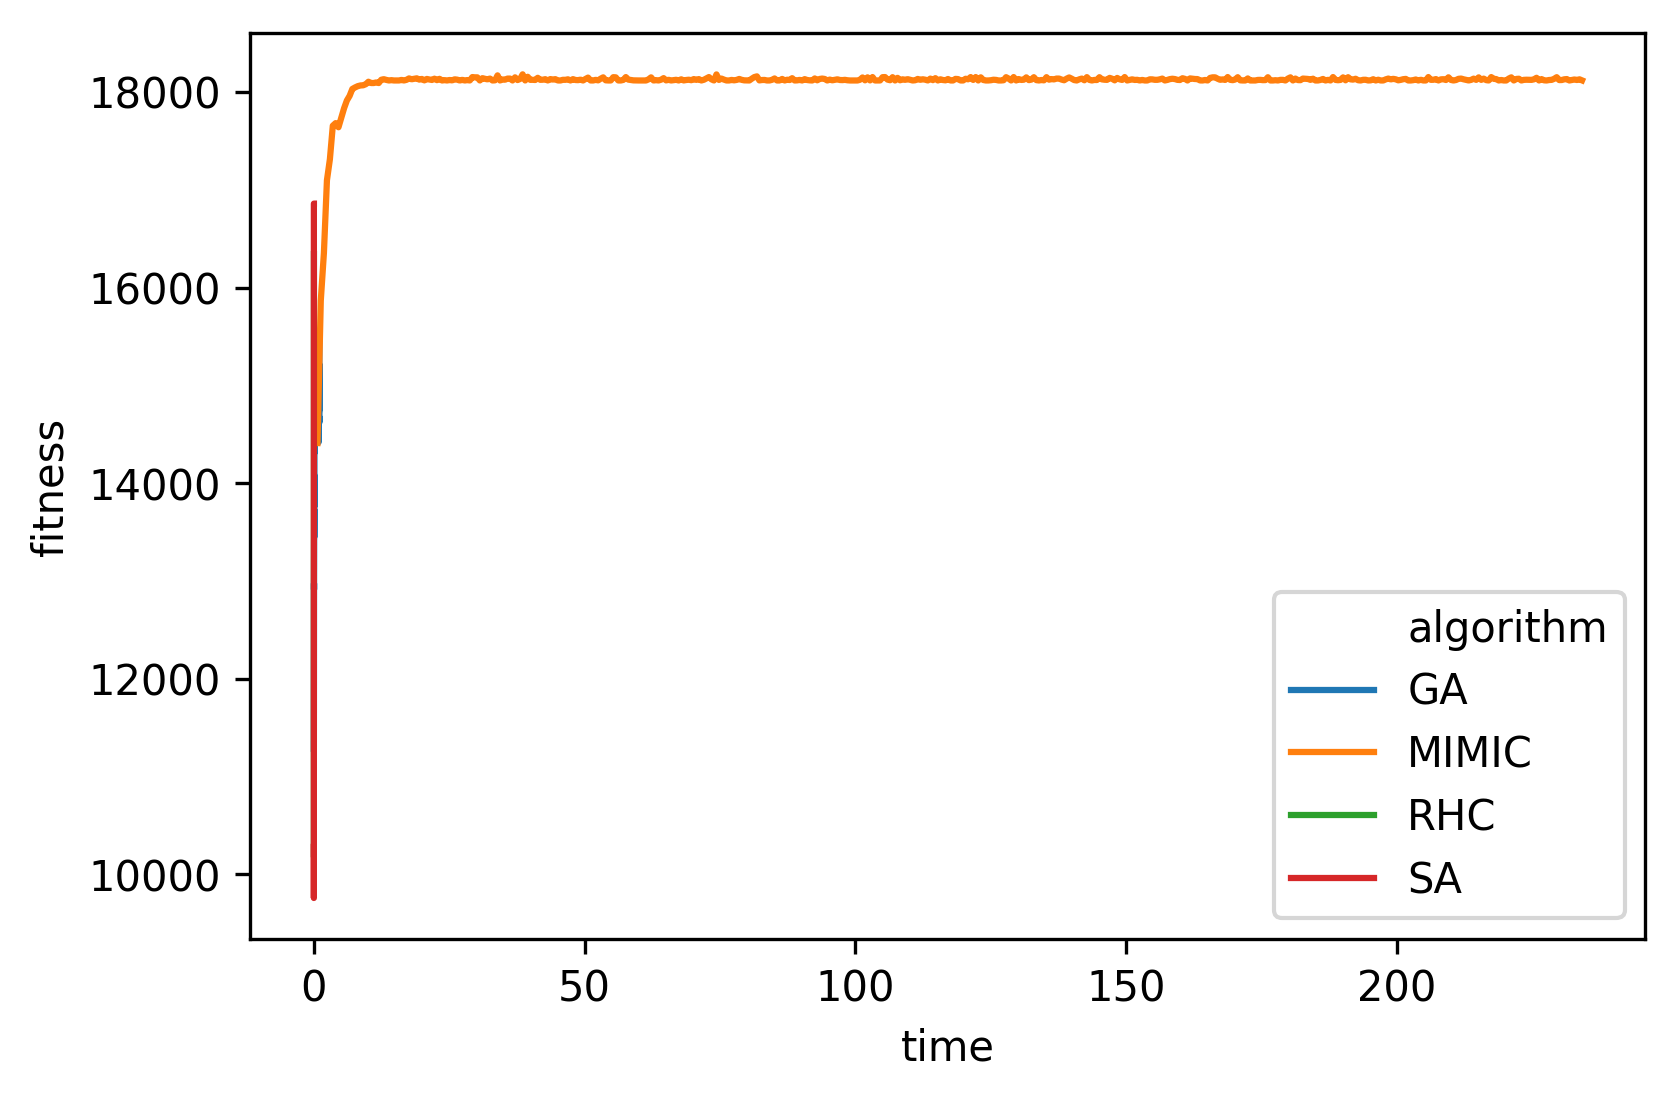

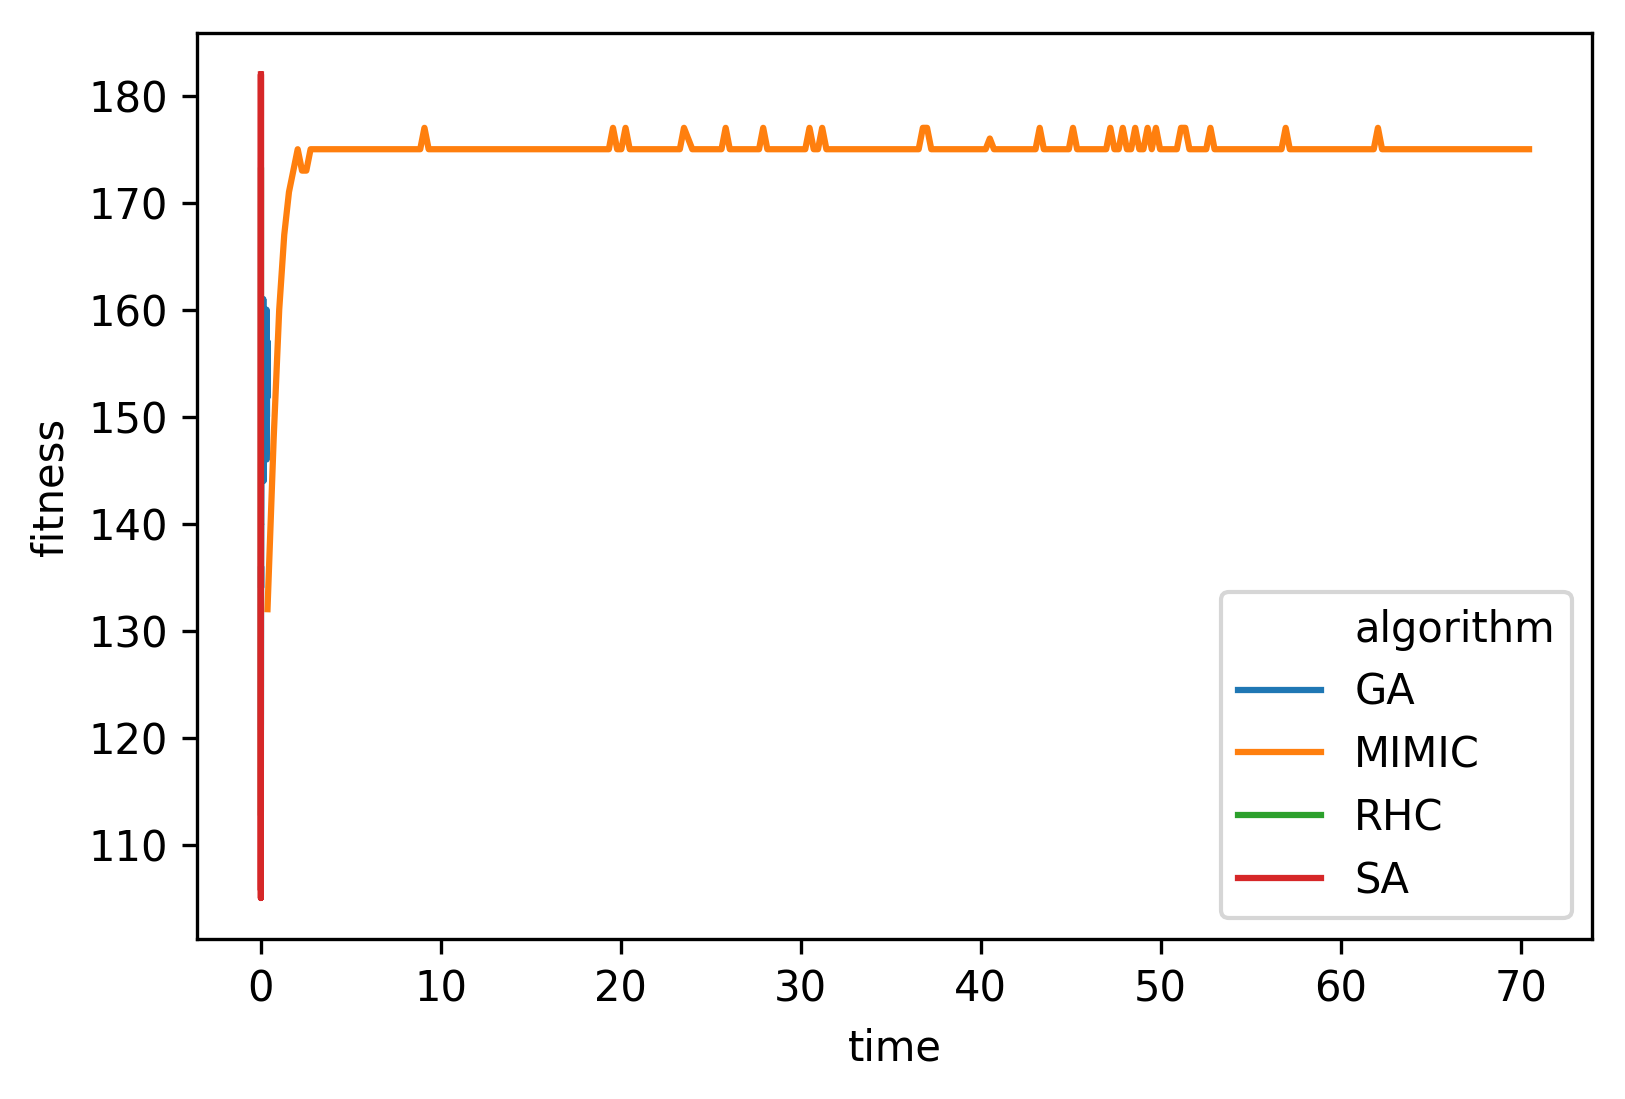

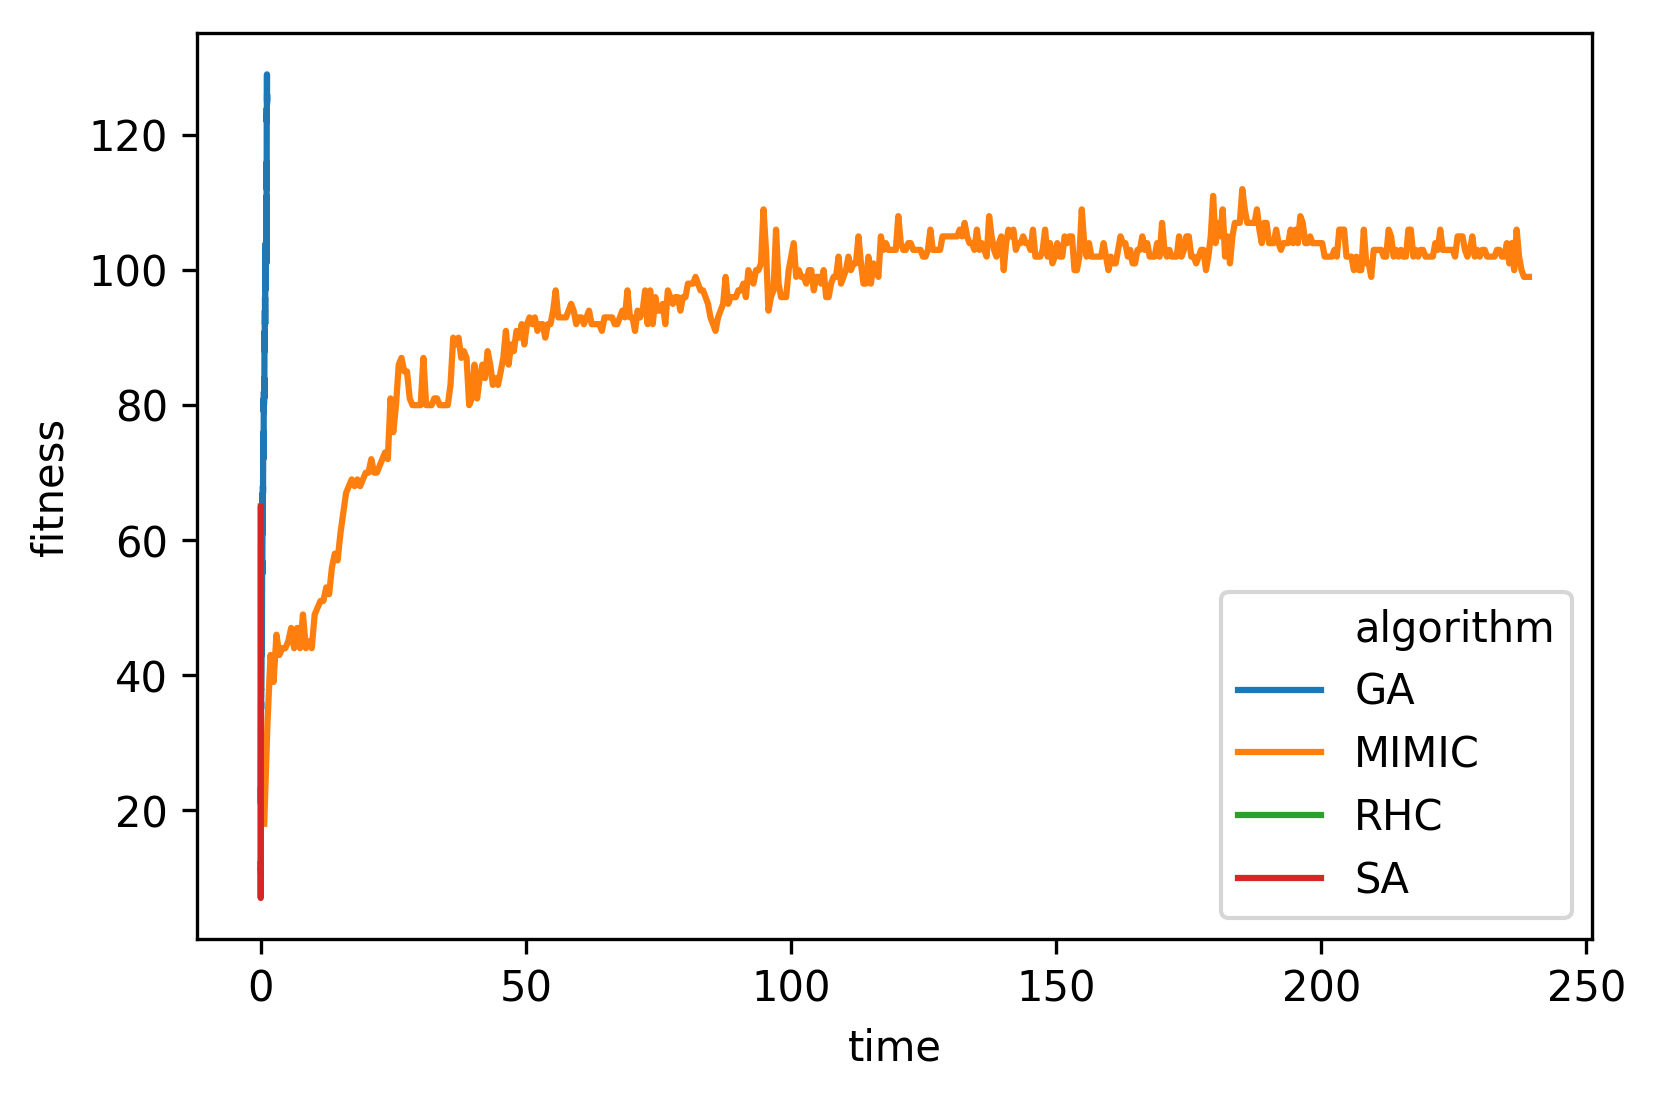

In [336]:
for idx,df_p in enumerate([df_knapsack,df_ff,df_contpeaks]):
    sns.lineplot((df_p['time']),(df_p['fitness']),hue=df_p["algorithm"],ci=None)
    plt.show()

In [9]:
df_clean.head()

problem algorithm  iterations  fitness
0  CONTPEAKS        GA           0     20.8
1  CONTPEAKS        GA          10     23.8
2  CONTPEAKS        GA          20     26.8
3  CONTPEAKS        GA          30     26.8
4  CONTPEAKS        GA          40     29.0

In [ ]:
        
"""            
        rhc = pd.read_csv("{}/{}_RHC_{}_LOG.txt".format(problem,problem,run))
        rhc["algorithm"] = "RHC"
        dfs[problem]["ga"] = ga
        dfs[problem]["rhc"] = rhc

        for CE in [0.15, 0.35, 0.55, 0.75, 0.95]:
            sa = pd.read_csv("{}/{}_SA{}_5_LOG.txt".format(problem,problem,CE))
            dfs[problem]["sa"] = 
   # for dependence in [0.1, 0.3, 0.5, 0.7, 0.9]:
        
      #  mimic = pd.read_csv("{}/{}_GA100_10_50_5_LOG.txt".format(problem,problem))
  """  
df_big["fevals"] = df_big["fevals"].astype('float',coerce=True)

In [ ]:
df_big_analysis=df_big.groupby(["problem","algorithm","hp","iterations","run"],as_index=False).agg({"fitness":"mean","time":"mean","fevals":"mean"})#.plot(x="iterations",y="fitness",)

In [ ]:
bga=df_big_analysis#.plot(x="iterations",) #= df_big_analysis.pivot(index='iterations', columns='hp', values='fitness')
fig,ax = plt.subplots()

for name in bga["hp"].value_counts().index:
    ax.plot(bga[bga.hp==name].iterations,bga[bga.hp==name].fitness,label=name)

ax.set_xlabel("year")
ax.set_ylabel("weight")
ax.legend(loc='best')

In [ ]:
bga

In [ ]:
bga["hp"].value_counts().index

In [ ]:
plt.show()

In [ ]:
df = dfs["KNAPSACK"]["rhc"].append(dfs["KNAPSACK"]["ga"])
#fig, ax = plt.subplots()

df = df.pivot(index='iterations', columns='algorithm', values='fitness')

df.plot()
#plt.legend(loc='algorithm')
plt.show()

In [ ]:
df